In [1]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Landmarks Data

In [3]:
# Landmarks JSON
landmarks_data = pd.read_json('./json files/fully_classified_puerto_rico_landmarks.json')

In [4]:
landmarks_df = pd.DataFrame(landmarks_data)

In [5]:
landmarks_df.head()

,content,metadata
0,Adjuntas barrio-pueblo is a barrio and the adm...,"{'type': 'landmark', 'city': 'Adjuntas', 'name..."
1,Casa Pueblo is an environmental community orga...,"{'type': 'landmark', 'city': 'Adjuntas', 'name..."
2,Casa Pueblo is an environmental community orga...,"{'type': 'landmark', 'city': 'Adjuntas', 'name..."
3,El Gigante Dormido ( Spanish for the sleeping ...,"{'type': 'landmark', 'city': 'Adjuntas', 'name..."
4,El Gigante Dormido ( Spanish for the sleeping ...,"{'type': 'landmark', 'city': 'Adjuntas', 'name..."


In [6]:
l_rows = landmarks_df.shape[0]
l_columns = landmarks_df.shape[1]

print('Landmarks data\n')
print(f"Number of rows: {l_rows}\nNumber of columns: {l_columns}\n")

Landmarks data

Number of rows: 695
Number of columns: 2



In [7]:
l_na_count_total = (landmarks_df == "N/A").sum().sum()
print(f"Total number of 'N/A' values in the DataFrame: {l_na_count_total}")

Total number of 'N/A' values in the DataFrame: 0


In [8]:
# Extract 'city' (municipality) from the 'metadata' dictionary
landmarks_df["municipality"] = landmarks_df["metadata"].apply(lambda x: x.get("city", "Unknown"))

# Count the number of landmarks per municipality
landmark_counts = landmarks_df["municipality"].value_counts().reset_index()

# Rename columns for clarity
landmark_counts.columns = ["Municipality", "Landmark Count"]

# Display results
print(landmark_counts)

   Municipality  Landmark Count
0      San Juan             141
1         Ponce             109
2       Arecibo              21
3      Mayagüez              20
4     Aguadilla              17
..          ...             ...
74     Peñuelas               1
75      Florida               1
76   Guayanilla               1
77   Las Marías               1
78       Juncos               1

[79 rows x 2 columns]


In [9]:
landmarks_df.head()

,content,metadata,municipality
0,Adjuntas barrio-pueblo is a barrio and the adm...,"{'type': 'landmark', 'city': 'Adjuntas', 'name...",Adjuntas
1,Casa Pueblo is an environmental community orga...,"{'type': 'landmark', 'city': 'Adjuntas', 'name...",Adjuntas
2,Casa Pueblo is an environmental community orga...,"{'type': 'landmark', 'city': 'Adjuntas', 'name...",Adjuntas
3,El Gigante Dormido ( Spanish for the sleeping ...,"{'type': 'landmark', 'city': 'Adjuntas', 'name...",Adjuntas
4,El Gigante Dormido ( Spanish for the sleeping ...,"{'type': 'landmark', 'city': 'Adjuntas', 'name...",Adjuntas


C:\Users\Jarian\AppData\Local\Temp\ipykernel_21804\2391236107.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=landmark_counts_sorted, x="Municipality", y="Landmark Count", palette="viridis")


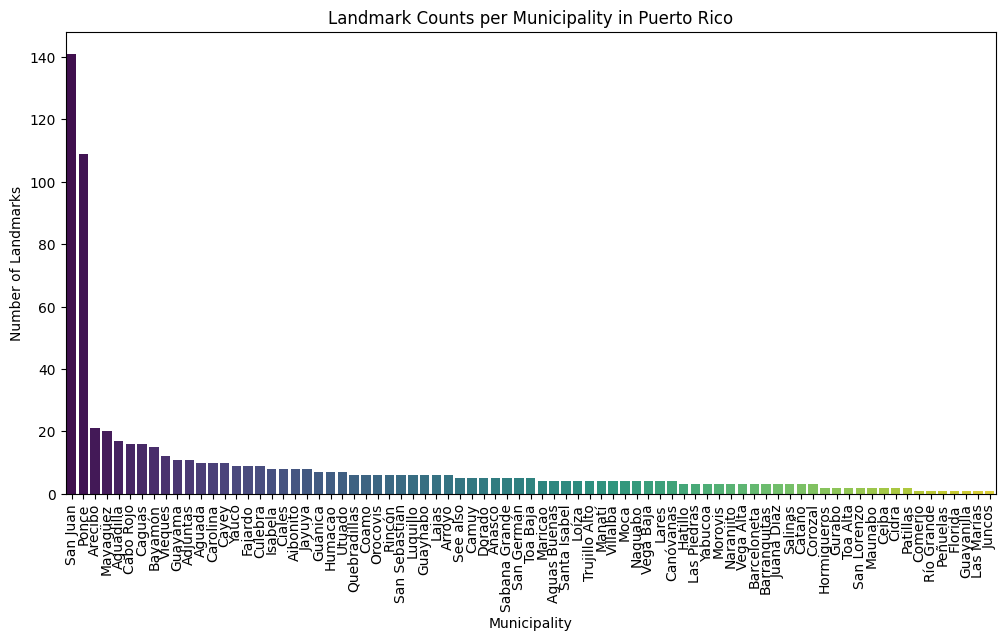

In [10]:
# Set figure size
plt.figure(figsize=(12, 6))

# Sort by landmark count for better visualization
landmark_counts_sorted = landmark_counts.sort_values(by="Landmark Count", ascending=False)

# Create a bar plot
sns.barplot(data=landmark_counts_sorted, x="Municipality", y="Landmark Count", palette="viridis")

# Rotate x-axis labels for readability
plt.xticks(rotation=90)

# Add labels and title
plt.xlabel("Municipality")
plt.ylabel("Number of Landmarks")
plt.title("Landmark Counts per Municipality in Puerto Rico")

# Show plot
plt.show()

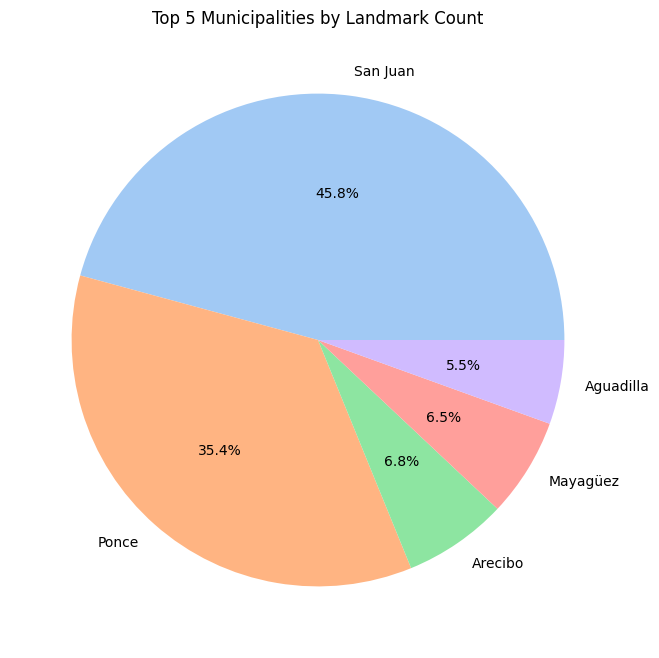

In [11]:
# Sort landmark counts in descending order
landmark_counts_sorted = landmark_counts.sort_values(by="Landmark Count", ascending=False)

# Select top 5 municipalities
top_5 = landmark_counts_sorted.head(5)

# Set figure size
plt.figure(figsize=(8, 8))

# Plot pie chart
plt.pie(
    top_5["Landmark Count"],
    labels=top_5["Municipality"],
    autopct="%1.1f%%",
    colors=sns.color_palette("pastel", len(top_5))
)

# Add title
plt.title("Top 5 Municipalities by Landmark Count")

# Show plot
plt.show()

In [60]:
# Get category for each landmark
# Extract the first category from the metadata column
def extract_first_category(metadata):
    categories = metadata.get("categories", [])  # Ensure categories exist
    return categories[0] if categories else "Uncategorized"  # Default to 'Uncategorized' if empty

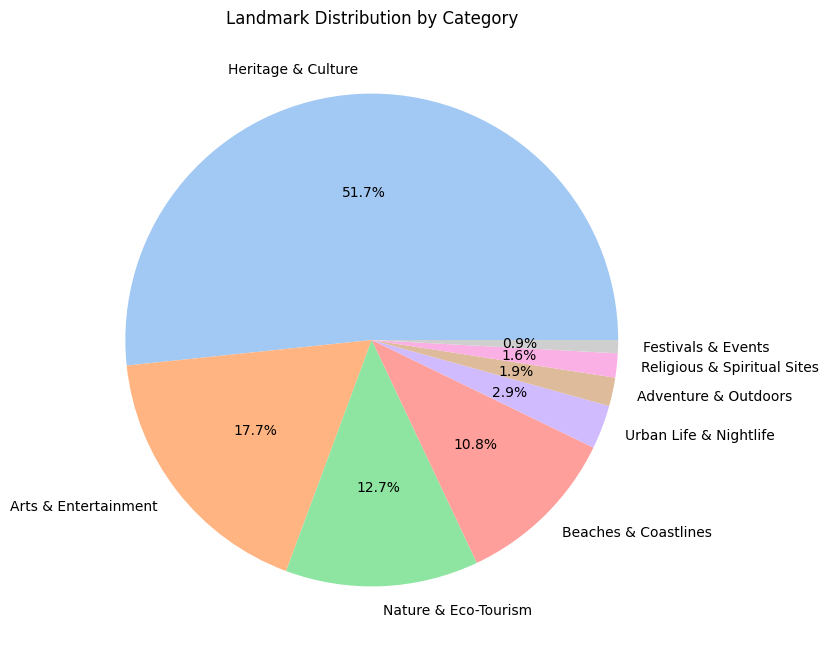

In [62]:
# Apply function to create a new column for the first category
landmarks_df["Category"] = landmarks_df["metadata"].apply(extract_first_category)

# Count occurrences of each category
category_counts = landmarks_df["Category"].value_counts()

# Set figure size
plt.figure(figsize=(10, 8))

# Plot pie chart
plt.pie(
    category_counts,
    labels=category_counts.index,
    autopct="%1.1f%%",
    colors=sns.color_palette("pastel", len(category_counts))
)

# Add title
plt.title("Landmark Distribution by Category")

# Show plot
plt.show()

## Municipalities Data

In [13]:
# Municipalities JSON
municipalities_data = pd.read_json('./json files/updated_puerto_rico_municipalities.json')

In [14]:
municipalities_df = pd.DataFrame(municipalities_data)

In [15]:
municipalities_df.head()

,content,metadata
0,Adjuntas ( Spanish pronunciation: [aðˈxuntas] ...,"{'type': 'city', 'city': 'Adjuntas', 'name': '..."
1,Aguada ( / ə ˈ ɡ w ɑː d ə / ; Spanish: [aˈɣwað...,"{'type': 'city', 'city': 'Aguada', 'name': 'Ag..."
2,Aguadilla ( Spanish pronunciation: [aɣwaˈðiʝa]...,"{'type': 'city', 'city': 'Aguadilla', 'name': ..."
3,"Aguas Buenas , ( Spanish pronunciation: [ˈaɣwa...","{'type': 'city', 'city': 'Aguas Buenas', 'name..."
4,Aibonito ( Spanish pronunciation: [ajβoˈnito] ...,"{'type': 'city', 'city': 'Aibonito', 'name': '..."


In [16]:
m_rows = municipalities_df.shape[0]
m_columns = municipalities_df.shape[1]

print('Municipalities data\n')
print(f"Number of rows: {m_rows}\nNumber of columns: {m_columns}\n")

Municipalities data

Number of rows: 78
Number of columns: 2



In [17]:
m_na_count_total = (municipalities_df == "N/A").sum().sum()
print(f"Total number of 'N/A' values in the DataFrame: {m_na_count_total}")

Total number of 'N/A' values in the DataFrame: 0


## Events Data

In [19]:
# Events JSON
event_data = pd.read_json('./json files/puerto_rico_events.json')

In [20]:
events_df = pd.DataFrame(event_data)

In [21]:
events_df.head()

,content,metadata
0,"As in most countries, this holiday is celebrat...","{'type': 'event', 'city': 'Puerto Rico', 'name..."
1,This is a Commonwealth of Puerto Rico official...,"{'type': 'event', 'city': 'Puerto Rico', 'name..."
2,A federal and commonwealth official holiday.,"{'type': 'event', 'city': 'Puerto Rico', 'name..."
3,A federal and commonwealth official holiday. A...,"{'type': 'event', 'city': 'Puerto Rico', 'name..."
4,A Commonwealth of Puerto Rico holiday. Puerto ...,"{'type': 'event', 'city': 'Puerto Rico', 'name..."


In [22]:
e_rows = events_df.shape[0]
e_columns = events_df.shape[1]

print('Events data\n')
print(f"Number of rows: {e_rows}\nNumber of columns: {e_columns}\n")

Events data

Number of rows: 29
Number of columns: 2



In [23]:
e_na_count_total = (events_df == "N/A").sum().sum()
print(f"Total number of 'N/A' values in the DataFrame: {e_na_count_total}")

Total number of 'N/A' values in the DataFrame: 0


## Trip Advisor Data

In [25]:
# Trip Advisor Data JSON
trip_advisor_data = pd.read_json('final_locations_info_cache.json')

In [26]:
trip_advisor_df = pd.DataFrame(trip_advisor_data)

In [27]:
trip_advisor_df.head()

,El Yunque,"Adjuntas Pueblo and its central plaza, Adjuntas, Puerto Rico","Casa Pueblo, Adjuntas, Puerto Rico","Castillo de los Niños, Adjuntas, Puerto Rico","El Gigante Dormido, Adjuntas, Puerto Rico","Garzas Lake, Adjuntas, Puerto Rico","Guilarte State Forest, Adjuntas, Puerto Rico","Las Cabañas Bridge, Adjuntas, Puerto Rico","Villa Sotomayor, Adjuntas, Puerto Rico","Aguada Museum and Historic Railway Station, Aguada, Puerto Rico",...,"Toa Alta, Toa Alta, Puerto Rico","Toa Baja, Toa Baja, Puerto Rico","Trujillo Alto, Trujillo Alto, Puerto Rico","Utuado, Utuado, Puerto Rico","Vega Alta, Vega Alta, Puerto Rico","Vega Baja, Vega Baja, Puerto Rico","Vieques, Vieques, Puerto Rico","Villalba, Villalba, Puerto Rico","Yabucoa, Yabucoa, Puerto Rico","Yauco, Yauco, Puerto Rico"
location_id,1448148,"{'location_id': '1491879', 'name': 'Adjuntas',...",1491879,1491879,1062342,1491879,{'location_id': {'location_id': {'location_id'...,1491879,275181,815418,...,15244023,1156069,2372888,1236992,2337164,6415499,10228770,4604516,652397,2208884
name,El Yunque National Forest,N/A,Adjuntas,Adjuntas,El Gigante Dormido,Adjuntas,N/A,Adjuntas,Parador Villas Sotomayor,Aguada,...,Toa Alta,Toa Baja,Trujillo Alto,Utuado,Vega Alta,Playa Vega Baja,Vieques Island,Villalba,Yabucoa,Yauco
description,Plan a day trip to the only tropical rainfores...,No description available.,No description available.,No description available.,No description available.,No description available.,No description available.,No description available.,"Parador Villas Sotomayor, the first and the on...",No description available.,...,No description available.,No description available.,No description available.,No description available.,No description available.,No description available.,"Isla de Vieques, one of the offshore island mu...",No description available.,No description available.,No description available.
address,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,...,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A
phone_number,+1 787-888-1880,N/A,N/A,N/A,+1 787-640-7889,N/A,N/A,N/A,N/A,N/A,...,N/A,N/A,N/A,N/A,N/A,+1 787-855-2500,N/A,N/A,N/A,N/A


In [28]:
trip_advisor_df.isnull().sum()

El Yunque                                                       0
Adjuntas Pueblo and its central plaza, Adjuntas, Puerto Rico    0
Casa Pueblo, Adjuntas, Puerto Rico                              0
Castillo de los Niños, Adjuntas, Puerto Rico                    0
El Gigante Dormido, Adjuntas, Puerto Rico                       0
                                                               ..
Vega Baja, Vega Baja, Puerto Rico                               0
Vieques, Vieques, Puerto Rico                                   0
Villalba, Villalba, Puerto Rico                                 0
Yabucoa, Yabucoa, Puerto Rico                                   0
Yauco, Yauco, Puerto Rico                                       0
Length: 726, dtype: int64

In [29]:
# Data rows
ta_rows = trip_advisor_df.shape[0]
ta_columns = trip_advisor_df.shape[1]

print('Trip Advisor API data\n')
print(f"Number of rows: {ta_rows}\nNumber of columns: {ta_columns}\n")

Trip Advisor API data

Number of rows: 17
Number of columns: 726



In [30]:
# Find N/A values
ta_na_count_total = (trip_advisor_df == "N/A").sum().sum()
print(f"Total number of 'N/A' values in the DataFrame: {ta_na_count_total}")

Total number of 'N/A' values in the DataFrame: 2700


In [31]:
# Find landmarks and attractions that had no description
ta_nd_count_total = (trip_advisor_df == "No description available.").sum().sum()
print(f"Total number of No descriptions found in the DataFrame: {ta_nd_count_total}")

Total number of No descriptions found in the DataFrame: 443
